In [1]:
import pandas as pd 
df = pd.read_csv("./data/wisc_bc_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
from sklearn.model_selection import train_test_split
target = df['diagnosis']
print(target.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['id','diagnosis'],axis=1),df[['diagnosis']],random_state=42,test_size=0.3)
print(X_train.shape[0],"\t",X_test.shape[0])

398 	 171


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
stc = StandardScaler()
scaled_ = stc.fit_transform(X_train)
dt = DecisionTreeClassifier()
dt.fit(scaled_,y_train)

test = dt.predict(stc.transform(X_test))
print(f"정확도는 {accuracy_score(test,y_test)*100:.2f}")

정확도는 94.15


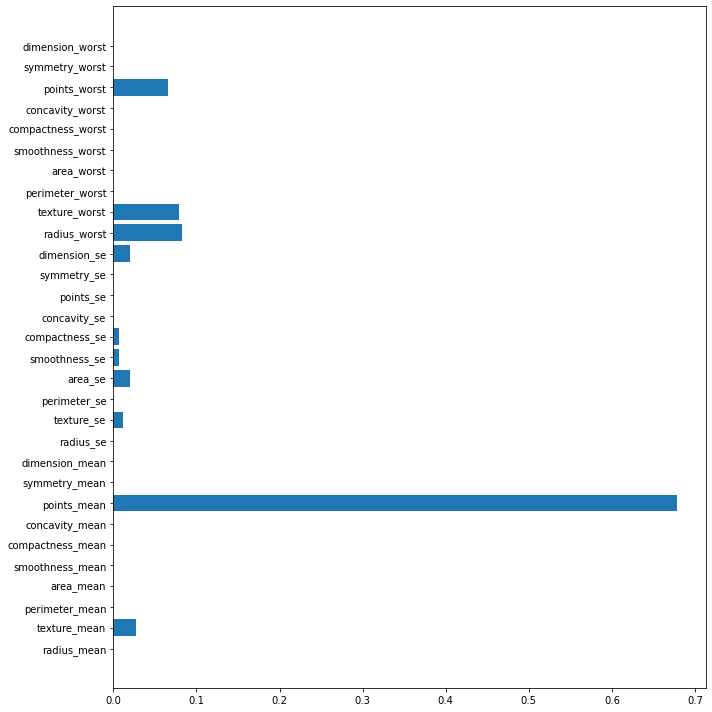

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=[10,10])
plt.barh(y= X_train.columns, width = dt.feature_importances_)
plt.tight_layout()
plt.show()